<a href="https://colab.research.google.com/github/MohammedAL-Ani/HC-with-TSP-using-Python/blob/main/TSP_moh_HC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TSP moh-HC

## HILL-CLIMBING ALGORITHM Pseudocode
```
Discrete Space Hill Climbing Algorithm
   currentNode = startNode;
   loop do
      L = NEIGHBORS(currentNode);
      nextEval = -INF;
      nextNode = NULL;
      for all x in L 
         if (EVAL(x) > nextEval)
              nextNode = x;
              nextEval = EVAL(x);
      if nextEval <= EVAL(currentNode)
         //Return current node since no better neighbors exist
         return currentNode;
      currentNode = nextNode;
```

## Main function

In [ ]:
# coding: utf-8
import sys
import time
import math
import random

def ReadDic(dicPath = './dataset.txt'):
    dic={}
    with open(dicPath) as f:
        r=f.read()
        read_line = r.split('\n')              
        
        for i in range(len(read_line)):         
            read_element = read_line[i].split()
            dic[int(read_element[0])] = [int(read_element[1])]
            dic[int(read_element[0])].append(int(read_element[2]))
             
        f.close()
    return dic

 

def initial(num): ## generate init city sequence
    seq = []
    while len(seq) < num:
        temp = random.randint(1,num)
        if temp not in seq:
            seq.append(temp)
            
    return seq

def cost(seq,dic):    
    dist = 0
    for i in range(len(seq)):
        axis = [ dic[seq[i]][0]-dic[seq[(i+1)%len(seq)]][0],dic[seq[i]][1]-dic[seq[(i+1)%len(seq)]][1]]
        dist += math.sqrt(axis[0]*axis[0]+axis[1]*axis[1]) # distance(d)
    return dist

# swap
def swap(swap_num,c):
    c = c.copy()
    def selectIndexs(swap_num=swap_num,c=c):
        c = c.copy()
        swIndexs = []
        while(len(swIndexs) != swap_num):
            ranIndex = random.randint(0,len(c)-1)
            if ranIndex not in swIndexs:
                swIndexs.append(ranIndex)
        return swIndexs
    swIndexs1 = selectIndexs()
    swIndexs2 = selectIndexs()
    
    for i in range(len(swIndexs1)):
        tmp = c[swIndexs1[i]]
        c[swIndexs1[i]] = c[swIndexs2[i]]
        c[swIndexs2[i]] = tmp
    return c.copy()

## DEF

In [ ]:
NUM_CITIES =30
DIC = ReadDic()
ITER_NUM = 1500


FileNotFoundError: ignored

## INIT

In [ ]:
pathSeq = initial(NUM_CITIES)
print('InitPath:',pathSeq,'\nCost=',cost(pathSeq,DIC))

In [ ]:
currentPath = pathSeq.copy()
currentVal = cost(currentPath,DIC)
nextPath = currentPath.copy()
nextVal = currentPath

## HC-Algorithm

In [ ]:
valRec = []
for i in range(ITER_NUM):
    nextPath = swap(3,currentPath)
    nextVal = cost(nextPath,DIC)
    if(nextVal < currentVal):
        currentPath = nextPath.copy()
        currentVal = nextVal
    valRec.append(currentVal)
    
print('CurrPath:',currentPath,'\nCost=',currentVal)

NameError: ignored

# PLOT

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
# from core import *

def showPlot(PATH_SEQ,title):
    # load
    DIC = ReadDic()
    with open('./dataset.txt','r') as f:
        dataset = f.read()
    dataset = dataset.split("\n")

    # x y
    x=[]
    y=[]
    for i in dataset:
        newi = i.split(" ")
        x.append(int(newi[1]))
        y.append(int(newi[2]))

    myX = []
    myY = []
    myPath = PATH_SEQ
    for i in myPath:
        _x,_y = DIC[i]
        myX.append(_x)
        myY.append(_y)
    
    # matplotlib.rcParams['axes.unicode_minus'] = False
    fig, ax = plt.subplots(figsize=(15,7))
    ax.plot(x, y,'o',color ='chartreuse')
    ax.set_title(title, color='blue')
    plt.plot(myX,myY,linestyle='--' ,color='maroon')
    plt.show()

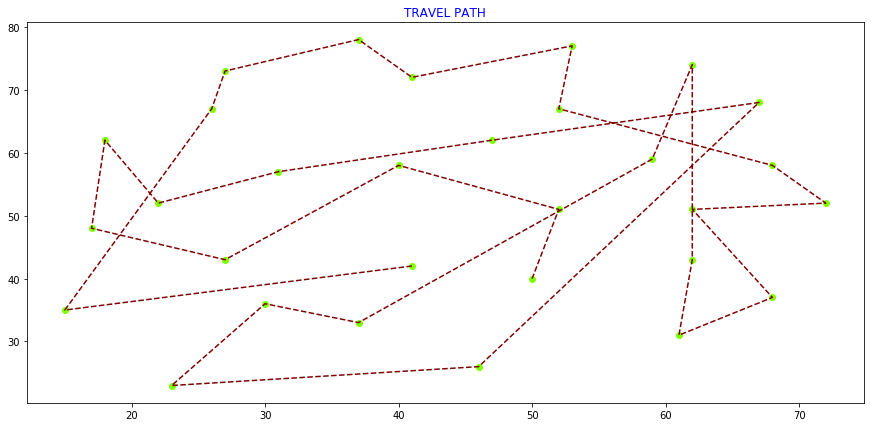

In [ ]:
showPlot(currentPath,'TRAVEL PATH')

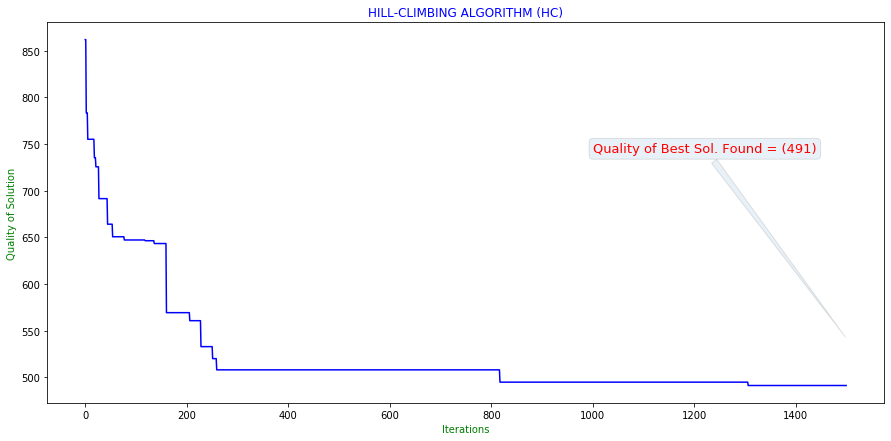

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(valRec,color ="b")
plt.title('HILL-CLIMBING ALGORITHM (HC)',color='blue')
plt.xlabel('Iterations',color ='green')
plt.ylabel('Quality of Solution',color ='green')


plt.annotate('Quality of Best Sol. Found = (%.2d)'%( currentVal), xy=(ITER_NUM, currentVal+50),color="red",xycoords='data',
             xytext=(-30, 190), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))
plt.show()